<a href="https://colab.research.google.com/github/RojaCM/DEEP-LEARNING-/blob/main/SENTIMENT%20ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPLEMENTING SENTIMENTAL ANALYSIS

In [40]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt 
from wordcloud import WordCloud  #library to visualize text data
%matplotlib inline

In [50]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
from sklearn.feature_extraction.text import CountVectorizer #transform text to vectors
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [9]:
#evalution metrics
from sklearn.metrics import accuracy_score,roc_curve,precision_score,classification_report,confusion_matrix

#we have 3 seperate datasets 1.train dataset 2.validation dataset 3.test dataset.
we will be concatenating train and validation dataset ,as we have test dataset seperately 

In [12]:
#reading train dataset
from google.colab import files
uploaded=files.upload()

Saving train.txt to train.txt


In [17]:
df_train=pd.read_csv('train.txt',delimiter=';',names=['text','label'])
df_train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [14]:
#reading validation dataset
from google.colab import files
uploaded=files.upload()

Saving val.txt to val.txt


In [19]:
df_val=pd.read_csv('val.txt',delimiter=';',names=['text','label'])
df_val.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [20]:
#concatenating train and validation dataset
df=pd.concat([df_train,df_val])

In [21]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [22]:
df.tail()

,text,label
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy
1999,i feel like i just wanna buy any cute make up ...,joy


In [24]:
df.shape

(18000, 2)

In [25]:
#resetting the dataframe index
df.reset_index(inplace=True)

In [27]:
df.tail()

,index,text,label
17995,1995,im having ssa examination tomorrow in the morn...,sadness
17996,1996,i constantly worry about their fight against n...,joy
17997,1997,i feel its important to share this info for th...,joy
17998,1998,i truly feel that if you are passionate enough...,joy
17999,1999,i feel like i just wanna buy any cute make up ...,joy


In [28]:
#making copy of dataframe before doing any changes to dataframe
df_copy=df.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


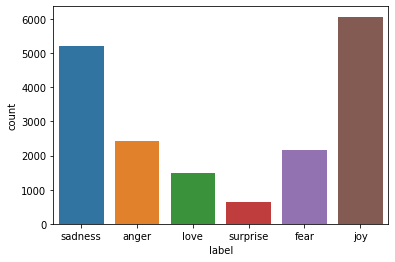

In [29]:
#let's check about the count of various target labels in our dataset
sns.countplot(df.label)

we have 6 labels or targets in the dataset. We can make a multi-class classifier for Sentiment Analysis. But, for the sake of simplicity, will merge these labels into two classes, i.e. Positive and Negative sentiment.

1. Positive Sentiment – “joy”,”love”,”surprise”

2. Negative Sentiment – “anger”,”sadness”,”fear”

Now, will create a custom encoder to convert categorical target labels to numerical form, i.e. (0 means negative sentiment and 1 means positive sentiment)

In [34]:
def custom_encoder(df):
  df.replace(to_replace='sadness',value=0,inplace=True)
  df.replace(to_replace='anger',value=0,inplace=True)
  df.replace(to_replace='fear',value=0,inplace=True)
  df.replace(to_replace='love',value=1,inplace=True)
  df.replace(to_replace='surprise',value=1,inplace=True)
  df.replace(to_replace='joy',value=1,inplace=True)

In [35]:
df['label'].unique() #before applying custom enoder

array([0, 'anger', 'love', 'surprise', 'fear', 'joy'], dtype=object)

In [36]:
custom_encoder(df)

In [37]:
df['label'].unique() #after appyling custom encoder

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


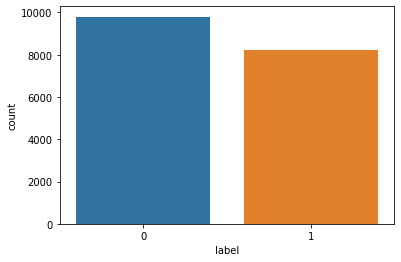

In [38]:
sns.countplot(df['label'])

data is in balanced state and traget label has two value 0 and 1


DATA PREPROCESSING

lets apply some data preprocessing steps before converting text into vectors  and then pass into machine learning model

#will create a fucntion  for preprocessing steps
1.lets remove all the characters apart from alphabets using regular expressions
2.we will convert the text into lowercase letters
3.get rid of stopwords since they dont make any impact on modeling accuracy
4.will perform lemmatization to find out the root form of a word

In [39]:
#lets create an object of lemmatizer
lm=WordNetLemmatizer()

In [57]:
def text_transformation(df_col):
  corpus=[]
  for i in df_col:
    new_item=re.sub('[^a-zA-Z]',' ',str(i))
    new_item=new_item.lower()
    new_item=new_item.split()
    new_item=[lm.lemmatize(j) for j in new_item if j not in set(stopwords.words('english'))]
    corpus.append(' '.join(str(x) for x in new_item))
  return corpus

In [58]:
corpus=text_transformation(df['text'])

In [59]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [60]:
corpus

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

will create a Word Cloud. It is a data visualization technique used to depict text in such a way that, the more frequent words appear enlarged as compared to less frequent words.

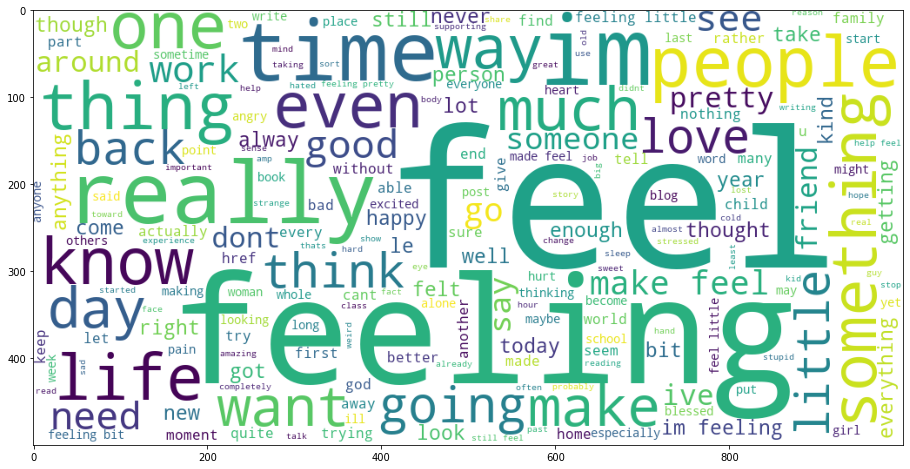

In [66]:
plt.figure(figsize=(20,8))
wordcloud=''

for row in corpus:
  for word in row:
    wordcloud+=' '.join(word)
word_cloud=WordCloud(width = 1000,height=500,background_color='white').generate(wordcloud)
plt.imshow(word_cloud)

Bag Of Words 
used to convert the text into numerical form,describes the total occurances of words within a document

In [72]:
cv=CountVectorizer(ngram_range=(1,2))
traindata=cv.fit_transform(corpus)
x=traindata
y=df['label']

MACHINE LEARNING MODEL CREATION PART

We will tune the parameters using GridSearchCV

will create a dictionary, “parameters” which will contain the values of different hyperparameters.

We will pass this as a parameter to GridSearchCV to train our random forest classifier model using all possible combinations of these parameters to find the best model.

In [73]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [74]:
grid_search=GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)

In [ ]:
grid_search.fit(traindata,y)
grid_search.best_params_

will choose the best parameters obtained from GridSearchCV and create a final random forest classifier model and then train our new model.

In [ ]:
rfc=RandomForestClassifier(max_features=,max_depth=,n_estimators=,min_samples_leaf=,min_samples_split=,bootstrap='')

In [ ]:
rfc.fit(x,y)

Test Data Transformation
Now, we will read the test data and perform the same transformations we did on training data and finally evaluate the model on its predictions.

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
df_test=pd.read_csv('test.txt',delimiter=';',names=['text','label']

In [ ]:
x=df_test.['text']

In [ ]:
y=df_test['label']

In [ ]:
#encode the labels into two classes , 0 and 1
custom_encoder(y)

In [ ]:
#pre-processing of text
test_corpus = text_transformation(x)

In [ ]:
#convert text data into vectors
testdata = cv.transform(test_corpus)

In [ ]:
#predict the target
predictions = rfc.predict(testdata)

In [ ]:
Model Evaluation
We will evaluate our model using various metrics such as Accuracy Score, Precision Score, Recall Score, Confusion Matrix and create a roc curve to visualize how our model performed.
from scikitplot.metrics import plot_confusion_matrix

In [ ]:
plt.figure(figsize=(10,5))
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

In [ ]:
Roc Curve:

We will find the probability of the class using the predict_proba() method of Random Forest Classifier and then we will plot the roc curve.

In [ ]:
predictions_probability = rfc.predict_proba(testdata)
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
As we can see that our model performed very well in classifying the sentiments, with an Accuracy score, Precision and  Recall of approx 96%. 

In [ ]:
we will check for custom input as well and let our model identify the sentiment of the input statement
#function to take the input statement 
def sentiment_predictor(input):
  input=text_transformation(input)
  transformed_input=cv.transform(input)
  prediction=rfc.predict(trasnformed_input)
  expression_check(prediction)


In [ ]:
def expression_check(prediction):
  if prediction==0:
    print('it is a negative sentiment')
  elif prediction==1:
    print('it is a positive sentiment')
  else:
    print('invalid statement')

In [ ]:
input1 = ["Sometimes I just want to punch someone in the face."]
input2 = ["I bought a new phone and it's so good."]

In [ ]:
sentiment_predictor(input1)

In [ ]:
sentiment_predictor(input2)